# Fundamentals of Computer Vision: Applied Projects


This Jupyter notebook contains the bases of the projects you need to develop during the semester.

The main goal of this project is twofold: 1st is to reiterate the theoretical context of the lectures and 2nd to use those methods in adapted examples for real-world scenarios.

---

## Import libraries, util functions and test image loading



In [1]:
import cv2
import urllib3
import numpy as np
from typing import List, Tuple  # for type hinting

from PIL import Image

from matplotlib import pyplot as plt


In [2]:
def visualize(images,titles,suptitles,n):
    fig, axes = plt.subplots(1, len(images), figsize=(10, 5))
    for i in range(len(images)):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(titles[i])
        axes[i].axis("off")
    if suptitles != None:
        plt.suptitle(suptitles[n])
    plt.tight_layout()
    plt.show()

def visualize_2(outputs, titles, suptitles, n):
    fig, axes = plt.subplots(len(outputs), len(outputs[0]), figsize=(10, 5))
    for i in range(len(outputs)):
      for j in range(len(outputs[0])):
        axes[i,j].imshow(outputs[i][j], cmap='gray')
        axes[i,j].set_title(titles[j])
        axes[i,j].axis("off")
    if suptitles!=None:
        plt.suptitle(suptitles[n])
    plt.tight_layout()
    plt.show()

# Block 3. Segmentation as region classifiers

## List of segmentation algorithms by type

### Threshold-Based Segmentation (Mandatory. Implement by hand / Extend from previous labs)
- **Global Thresholding**: Applies a single threshold value across the entire image to separate objects from the background.
- **Adaptive Mean Thresholding**: Computes thresholds for different regions of the image based on mean values to handle varying lighting conditions.
- **Otsu's Thresholding**: Calculates an optimal threshold value that minimizes intra-class variance, or equivalently, maximizes inter-class variance.

### Edge-Based Segmentation (Mandatory. Implement by hand / Extend from previous labs)
- **Sobel Operator**: Detects edges using a pair of 3x3 convolution kernels, one for horizontal changes, and one for vertical.
- **Canny Edge Detector**: A multi-stage algorithm that includes noise reduction, gradient calculation, non-maximum suppression, and edge tracking by hysteresis.
- **Laplacian of Gaussian (LoG)**: Applies a Gaussian blur to smooth the image before computing the Laplacian for edge detection, capturing blobs and edges.

### Watershed-Based Segmentation (Mandatory. Use OpenCV implementation)
- **Watershed Algorithm**: Treats the gradient magnitude of an image as a topographic surface and finds watershed lines to segment the image based on catchment basins.

### Region-Based Segmentation (Choose 1. Implement by hand. Can make use of scikit-image library)
- **Split-and-Merge**: This technique recursively splits an image into regions based on a homogeneity criterion and then merges adjacent regions that have similar properties.
- **Flood Fill**: Also known as seed fill, this method starts from a seed point and grows a region by adding neighboring pixels that are similar to the seed.
Represents an image as a graph, where nodes correspond to segments and edges represent adjacency between segments, then merges nodes based on similarity measures.

### Clustering-Based Segmentation (Only analysis)
- **K-means Clustering**: Partitions the image into clusters based on pixel color or intensity, with the number of clusters predefined.
- **Gaussian Mixture Models (GMM)**: Uses a probabilistic model to represent normally distributed subpopulations within the overall population, providing a soft-segmentation of the image.


### List of ideas for improving some methods results
---

### Threshold-Based Segmentation

Global Thresholding:
1. Implement histogram analysis to automatically select a better global threshold.
2. Experiment with different global thresholds and evaluate the results using entropy-based or region-based metrics.

Adaptive Mean Thresholding:
1. Explore the use of different shapes and sizes for the local neighborhood when computing the mean value.
2. Combine with a preprocessing step that performs histogram equalization to enhance contrast before thresholding.

Otsu's Thresholding:
1. Extend Otsu's method to work with multi-level thresholds instead of just bi-level thresholds.


### Edge-Based Segmentation

Canny Edge Detector:
1. Optimize the selection of low and high threshold values using the median of the gradient magnitudes.
2. Implement an automated hysteresis process that adapts to the edge strength histogram of the image.

Laplacian of Gaussian (LoG):
1. Experiment with scale-space representation by varying the standard deviation of the Gaussian filter.
2. Automate the selection of the Gaussian kernel size based on the analysis of the image frequencies.

### Watershed-Based Segmentation

Watershed Algorithm:
1. Implement pre-processing steps to reduce noise, such as morphological operations, before applying the watershed.
2. Use marker-based watershed segmentation, where markers are determined automatically through morphological operations or distance transformation.

### Region-Based Segmentation

Split-and-Merge (RAG):
1. Incorporate texture or color gradients as additional criteria for deciding splits or merges, enhancing the segmentation for complex scenes.

Flood Fill:
1. Develop an adaptive flood fill algorithm where the tolerance level for pixel similarity is determined based on local image statistics.
2. Integrate edge detection results to guide the flood fill process, preventing it from crossing likely boundaries.


## Mandatory Questions

#### Threshold-Based Segmentation
1. Explain the basic concept of global thresholding. How is a single threshold value determined and applied across the entire image?
2. In what scenarios is adaptive mean thresholding more effective than global thresholding?
3. Describe Otsu's thresholding method in detail. How does it compute an optimal threshold value, and what makes it different from simple global thresholding?

#### Edge-Based Segmentation
4. Describe how the Sobel operator works. What are the roles of its horizontal and vertical kernels?
5. Explain the steps involved in the Canny Edge Detector algorithm.
6. What is the Laplacian of Gaussian? How does it differ from applying a Laplacian filter directly?

#### Watershed-Based Segmentation
7. Describe the watershed algorithm. How does it use the concept of topography to segment images?

#### Region-Based Segmentation*
8. Explain the process of region growing. How does the algorithm determine which pixels to include in a region?
9. Describe mean-shift segmentation. What are its main advantages and limitations?
10. What is the split-and-merge approach to image segmentation? How does it differ from region growing?
11. Explain the flood fill algorithm. In what situations is it most effective?

#### Clustering-Based Segmentation
12. How does K-means clustering segment an image? What are the limitations of this method?
13. Explain both Gaussian Mixture Models and K-means in the context of image segmentation. Which are the similarities and difference between the methods?


*Answer only the ones related to your selection

### Optional Questions

1. Compare and contrast the output of edge-based and region-based segmentation techniques. In what situations would you prefer one over the other? Explain why and provide examples on each method perform better than the other.
2. How does the choice of parameters (like kernel size or threshold values) affect the outcome of different segmentation algorithms? Since it can affect differently depending on the algorithm, explain how affects on each of them.
3. Analyze the computational complexity of the different segmentation methods. Which methods are more suitable for real-time applications? Provide "big O" notation and an estimation of the execution time for the methods.
4. Discuss the challenges of segmenting images with low contrast. What methods can be particularly effective in these scenarios?
5. Investigate the impact of image resolution on the performance of various segmentation algorithms. Are they sensitive or not?
6. Explore the use of segmentation in object tracking (segment and recognize the same object in a video). Which methods are most effective and why?
7. Discuss the limitations of traditional segmentation techniques in handling complex images and suggest potential improvements.
8. Evaluate the effectiveness of combining multiple segmentation techniques. Can hybrid approaches yield better results? Propose some hybrid methods. Are ensemble methods enough for improving results?
9. Analyze the role of color spaces in image segmentation. How does the choice of color space affect segmentation performance?


Since `Optional questions` ask about several topics I suggest to tackle them into a separete section in the report (Discussion / Comparision / Analysis) instead of including fragrments of the answer across each type of the method

## 1. Threshold-based Segmentation Exercise
**Objective:**  
Implement basic global thresholding method.
Then the adaptive version. Later implement Otsu's thresholding algorithm to find automatically the best value. Finally implement the local versions of those algorithms.

**Guideline:**
1. Load a grayscale image.
2. Apply basic global thresholding on the image.
3. Apply local basic thresholding on the image (adaptive mean thresholding)
3. Implement Otsu's threshold selection algorithm.
4. Apply and compare the results to the basic counterparts

**Expected Results:**  
- Segmented image with the different thresholding methods


In [3]:
def global_thresholding(image, threshold):
    """
    Apply global thresholding to an image.

    Parameters:
    image (array_like): The input image to be thresholded.
    threshold (int): The global threshold value.

    Returns:
    array_like: Thresholded binary image.
    """
    height,width = image.shape
    output_image = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            if image[i][j]>= threshold:
                output_image[i][j] =255
            else:
                output_image[i][j]=0
    return output_image


def adaptive_mean_thresholding(image, region_size, C):
    """
    Apply adaptive mean thresholding to an image.

    Parameters:
    image (array_like): The input image to be thresholded.
    region_size (int): The size of the local region around each pixel for calculating the mean.
    C (int): Constant subtracted from the mean to compute the local threshold value.

    Returns:
    array_like: Thresholded binary image.
    """
    height, width = image.shape
    output_image = np.zeros_like(image)
    half_region = region_size // 2
    for i in range(half_region, height - half_region):
        for j in range(half_region, width - half_region):
            #Extract neighborhood
            neighborhood = image[i - half_region:i + half_region + 1, j - half_region:j + half_region + 1]
            #Apply median filter
            if image[i][j]>= np.mean(neighborhood)-C:
                output_image[i][j] =255
            else:
                output_image[i][j]=0
    return output_image

def otsu_thresholding(image,message=False):
    """
    Apply Otsu's thresholding to an image.

    Parameters:
    image (array_like): The input image to be thresholded.

    Returns:
    array_like: Thresholded binary image.
    """
    height,width = image.shape
    output_image = np.zeros_like(image)

    total_pixel_bins_num = 256
    
    # Get the image histogram
    hist, bin_edges = np.histogram(image, bins=total_pixel_bins_num)
      
    # Calculate centers of bins
    bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.
    
    # Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
    weight1 = np.cumsum(hist)
    weight2 = np.cumsum(hist[::-1])[::-1]
    
    # Avoid division by zero
    weight1[weight1 == 0] = 1
    weight2[weight2 == 0] = 1
    
    # Get the class means mu0(t)
    mean1 = np.cumsum(hist * bin_mids) / weight1
    # Get the class means mu1(t)
    mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]
    
    #formula
    inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
    
    # Maximize the inter_class_variance function val
    index_of_max_val = np.argmax(inter_class_variance)
    
    threshold = bin_mids[:-1][index_of_max_val]
    for i in range(height):
        for j in range(width):
            if image[i][j]>= threshold:
                output_image[i][j] =255
            else:
                output_image[i][j]=0

    if message:
        print("Otsu's algorithm implementation thresholding result (manually computed): ", threshold)
    return output_image

def adaptive_mean_thresholding_CV2(image, region_size, C):
    output_image = cv2.adaptiveThreshold(image, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, region_size, C)
    return output_image

def otsu_thresholding_CV2(image,message=False):
    threshold, output_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    if message:
        print("Otsu's algorithm implementation thresholding result (CV2 function): ", threshold)
    return output_image


def local_thresholding(image, kernel_size, threshold, region_size, C_value):
    """
    Apply any method but in their local counterpart.

    Parameters:
    image (array_like): The input image to be thresholded.
    method (str): string with the thresholding method.
    kernel_size (int): Size used for the local window.

    Returns:
    array_like: Thresholded binary image.
    """
    height,width = image.shape
    output_images = [image]

    # List of functions
    functions = [global_thresholding, adaptive_mean_thresholding, adaptive_mean_thresholding_CV2,
                 otsu_thresholding, otsu_thresholding_CV2]

    # List of corresponding parameters for each function
    parameters = [{'threshold': threshold},{'region_size': region_size, 'C': C_value},
                  {'region_size': region_size, 'C': C_value},{},{}]

    iterations_h = height // kernel_size
    iterations_w = width // kernel_size

    for funct, params in zip(functions,parameters):
        output_image = np.zeros_like(image)
        # Iterate over the image
        for i in range(iterations_h):
            for j in range(iterations_w):
                # Extract the local region from the image
                local_region = image[i*kernel_size:(i+1)*kernel_size, j*kernel_size:(j+1)*kernel_size]
                output_image[i*kernel_size:(i+1)*kernel_size, j*kernel_size:(j+1)*kernel_size]= funct(local_region,**params)

        # Handle the remaining parts of the image (the image does not have to be a square e.g 10x10, so it need to handle it anyway)
        for i in range(iterations_h*kernel_size, height, kernel_size):
            for j in range(width, kernel_size):
                end_i = min(i+kernel_size, height)
                end_j = min(j+kernel_size, width)
                output_image[i:end_i, j:end_j] = funct(image[i:end_i, j:end_j], **params)

        for i in range(height, kernel_size):
            for j in range(iterations_w*kernel_size, width, kernel_size):
                end_i = min(i+kernel_size, height)
                end_j = min(j+kernel_size, width)
                output_image[i:end_i, j:end_j] = funct(image[i:end_i, j:end_j], **params)

        #Store output image
        output_images.append(output_image)

    return output_images


Otsu's algorithm implementation thresholding result (manually computed):  136.962890625
Otsu's algorithm implementation thresholding result (CV2 function):  137.0


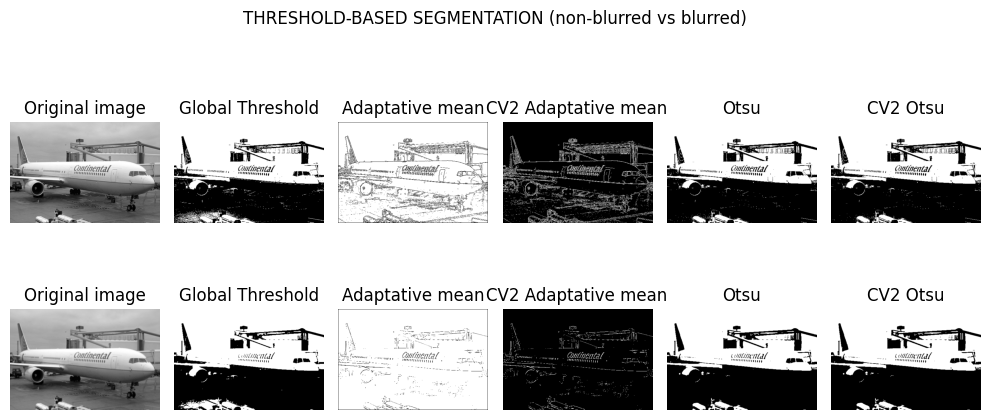

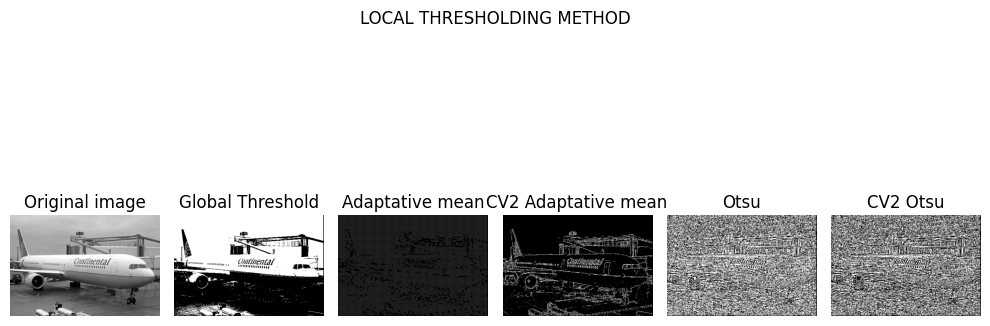

In [5]:
images = ["aeroplane/2011_002114.jpg"]
for image in images:
 image = cv2.imread(f"images/images/{image}",cv2.IMREAD_GRAYSCALE)
 if image is None:
    print("Image not found")
 else:
   #Get parameters
   threshold = int(input("Enter the threshold (0-255 value): "))
   region_size = int(input("REGION SIZE: "))
   C_value = int(input("VALUE OF C: "))
   #Apply algorithms
   outputs_1 = [image,
               global_thresholding(image,threshold),                         #Global thresholding
               adaptive_mean_thresholding(image, region_size, C_value),      #Adaptative mean thresholding
               adaptive_mean_thresholding_CV2(image, region_size, C_value),
               otsu_thresholding(image,message=True),                                     #Otsu thresholding
               otsu_thresholding_CV2(image,message=True)]
   
   #BLUR APPLIED
   image_blur = cv2.blur(image,(3,3))
   outputs_2 = [image_blur,
                global_thresholding(image_blur,threshold),                    #Global thresholding
                adaptive_mean_thresholding(image_blur, region_size, C_value), #Adaptative mean thresholding
                adaptive_mean_thresholding_CV2(image_blur, region_size, C_value),
                otsu_thresholding(image_blur),                                #Otsu thresholding
                otsu_thresholding_CV2(image_blur)]
   
   #Local thresholding
   kernel_size = int(input("KERNEL SIZE: "))
   outputs_localthresh = local_thresholding(image,kernel_size,threshold, region_size, C_value)
   
   #Visualization
   output_titles = ["Original image","Global Threshold","Adaptative mean","CV2 Adaptative mean","Otsu","CV2 Otsu"]
   visualize_2([outputs_1,outputs_2],output_titles,["THRESHOLD-BASED SEGMENTATION (non-blurred vs blurred)"],0)
   visualize(outputs_localthresh,output_titles,["LOCAL THRESHOLDING METHOD"],0)


## 2. Edge-based Segmentation Exercise
**Objective:**  
Implement edge detectors based in sobel filters, Canny, and Laplacian of Gaussian.


**Guideline:**
1. Load a grayscale image.
2. Compute Sobel filters and the norm to obtain the edges of the image.
3. Implement Canny filter and compare the results to the Sobel results.
4. Implement Laplacian of Gaussian edge detectors.
5. (Optional) Find a method to fill the connected regions to obtain segmented regions (instead of edge regions)

**Expected Results:**  
- Segmented image with the different methods and comparison between them (qualitaively)


In [6]:
def convolution(image, kernel, stride=1, padding=0):
    """
    Applies convolution to an RGB or greyscale image manually, without using library implementations.
    """
    #Size of kernel, input image and output image
    try:
        image_height, image_width, channels = image.shape
    except ValueError: #If it's greyscale image
        image_height, image_width = image.shape
        channels = 1
    kernel_height, kernel_width = kernel.shape

    output_image = np.zeros_like(image)  # Create an empty output image of the same shape as the input

    #Flip kernel
    flipped_kernel = kernel[::-1, ::-1]  # Reverse the order of rows and columns

    #Padding
    padding_height = kernel_height // 2
    padding_width = kernel_width // 2
    try:
        padded_image = np.pad(image, ((padding_height, padding_height), (padding_width, padding_width), (0, 0)), mode='constant')
    except ValueError: #If it's greyscale image
        padded_image = np.zeros((image_height + 2 * padding_height, image_width + 2 * padding_width))
        padded_image[padding_height:padding_height + image_height, padding_width:padding_width + image_width] = image
    
    #Do convolution
    try:
        for channel in range(channels):
            for i in range(padding_height, image_height+padding_height):
                for j in range(padding_width, image_width+padding_width):
                    roi = padded_image[i-padding_height:i+padding_height+1, j-padding_width:j+padding_width+1, channel]  # Region of interest
                    convolution_result = np.sum(roi * flipped_kernel)
                    output_image[i-padding_height, j-padding_width, channel] = min(max(int(convolution_result), 0), 255)
    except IndexError: #If it's greyscale image
        for i in range(image_height):  #i = row we're in
            for j in range(image_width):  #j = column we're in
                roi = padded_image[i:i+kernel_width,j:j+kernel_height]  #Region of interest (np array we want to multiply by kernel)
                convolution_result = np.sum(roi * flipped_kernel)
                output_image[i,j] = convolution_result

    return output_image

In [7]:
from scipy.signal import convolve2d

def sobel_edge_detection(image, kernel_size):
    """
    Apply Sobel operator to detect edges in an image.

    Parameters:
    image (array_like): The input image for edge detection.
    kernel_size (int number): Size of the sobel kernels (either 3 or 5)

    Returns:
    grad_magnitude (array_like): image with sobel filter applied
    normalized (array_like): image with sobel filter applied and normalized
    direction (int): orientation of the gradient
    """
    if kernel_size != 3 and kernel_size != 5:
        print("Error. Size of kernel is not a possible value (only 3 or 5).")
        return
    
    #Do convolution with sobel kernels
    gx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=kernel_size)
    gy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=kernel_size)

    #Do module of both convolutions
    grad_magnitude = np.sqrt(gx**2 + gy**2)
    direction = np.arctan2(gy, gx)

    #Normalize to obtain edges
    result = cv2.normalize(np.abs(grad_magnitude), None, 0, 255, cv2.NORM_MINMAX)

    return result, direction

#CANNY EDGE DETECTOR
def nms(gradient, direction):
    """
    Apply Non-Maximum Suppression to a gradient magnitude
    
    Parameters:
    gradient (array_like): gradient magnitude
    direction (int): gradient direction

    Functionality: iterate through each pixel in gradient image and finds pixels which 
    direction are in the direction of the gradient.
        If the intensity of pixel is max compared to other pixels in = direction --> value is kept.
        Otherwise, the value = 0
    Objective: thin out edges

    Returns:
    array_like: edge-thinned image 
    """
    #Get dimensions of gradient
    m,n = gradient.shape
    #Initialize output
    output = np.zeros((m,n),dtype=np.int64)
    #Convert direction to degrees
    angle = direction * 180 / np.pi
    #Adjust the angles to be within 0-180 degrees
    angle[angle<0] += 180
    
    #Iterate over each pixel in the gradient
    for i in range(1, m-1):
        for j in range(1, n-1):
            try:
                #Initial values
                q = 255
                r = 255
                #If the direction of the gradient is 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j]):
                    #Compare with east and west neighbours
                    q = gradient[i, j+1]
                    r = gradient[i, j-1]
                #If the direction of the gradient is 45
                elif (22.5 <= angle[i,j] < 67.5):
                    #Compare with the north-east and south-west neighbors
                    q = gradient[i+1, j-1]
                    r = gradient[i-1, j+1]
                #If the direction of the gradient is 90
                elif (67.5 <= angle[i,j] < 112.5):
                    #Compare with the north and south neighbors
                    q = gradient[i+1, j]
                    r = gradient[i-1, j]
                #If the direction of the gradient is 135
                elif (112.5 <= angle[i,j] < 157.5):
                    #Compare with the north-west and south-east neighbors
                    q = gradient[i-1, j-1]
                    r = gradient[i+1, j+1]

                #NON-MAX SUPRESSION
                #If the intensity of the current pixel is greater than its neighbors
                if (gradient[i,j] >= q) and (gradient[i,j] >= r):
                    #It is a local maximum, so keep it
                    output[i,j] = gradient[i,j]
                else:
                    #It is not a local maximum, so suppress it
                    output[i,j] = 0

            except IndexError as e:#Handle the exception for pixels at the border of the image
                pass

    return output

def hysteresis_thresholding(g_nms):
    """
    Apply hysteresis thresholding to Non-Maximum supressed gradient.

    Parameters:
    g_nms (array_like): Non-Maximum Supression on image gradient.

    Functionality: 
        STEP 1: Find right values for thresholds
        STEP 2: Classify edges as sure-edges, weak and non-edges.
            Then determine wether weak edegs are connected or not to sure edges.
            If yes, they become sure-edges. If not, they are set to 0.

    Returns: Hysteresis thresholding array-like
    """
    #STEP 1: Choose right values for high and low threshold
    #Calculate gradient magnitudes
    gradient_magnitudes = np.abs(g_nms)
    #Set value of high threshold as higher values above 90%
    high_t = np.percentile(gradient_magnitudes.flatten(),90)
    #Set low threshold as a fraction of high_t
    low_t = high_t * 0.1
    print("High threshold applied in hysteresis: ", high_t)
    print("Low threshold applied in hysteresis: ", low_t)

    #STEP 2: Set strong, non-edge and weak edges
    m,n = g_nms.shape
    output = np.zeros((m,n), dtype=np.uint8)
    #If intensity > high_t = sure edge, if intensity < low_t = non-edge
    strong_i, strong_j = np.where(g_nms >= high_t)
    zeros_i, zeros_j = np.where(g_nms < low_t)
    #Weak edges = in middle
    weak_i, weak_j = np.where((g_nms<=high_t) & (g_nms>=low_t))
    #Set = intensity values for all edge pixels
    output[strong_i,strong_j] = 255
    output[zeros_i,zeros_j] = 0
    output[weak_i,weak_j] = 75
    #See if weak edges are strong (connected to sure edge) or non-edged
    for i in range(1,m-1):
        for j in range(1,n-1):
            if (output[i,j] == 75): #If it's a weak edge
                if 255 in [output[i+1,j-1],output[i+1,j],output[i+1,j+1],output[i,j-1],
                           output[i, j+1],output[i-1, j-1],output[i-1, j],output[i-1, j+1]]:
                    output[i,j] = 255
                else:
                    output[i,j] = 0
    return output


def canny_edge_detector(image, g_size):
    """
    Apply Canny edge detector to an image.

    Parameters:
    image (array_like): The input image for edge detection.
    g_size (int): Size of the Gaussian Kernel to apply smoothing.

    Returns:
    array_like: The binary image representing detected edges.
    """
    if g_size != 3 and g_size != 5:
        print("Error. Size of kernel is not a possible value (only 3 or 5).")
        return
    
    #Apply smoothing with Gaussian Kernel
    smoothed_image = cv2.GaussianBlur(image, (g_size, g_size), 0)
    #Compute gradient of smoothed image
    gradient, direction = sobel_edge_detection(smoothed_image,kernel_size=3)
    #Apply Non-Maximum Suppresion to gradient
    g_nms = nms(gradient, direction)
    #Apply Hysteresis Thresholding to G_nms using Tlow and Thigh
    hysteresis = hysteresis_thresholding(g_nms)
    
    return smoothed_image, gradient, g_nms, hysteresis

#LAPLACION OF GAUSSIAN
def ZeroCrossings(log):
    output = np.zeros_like(log)
    #For each pixel count number of positive and negative pixels in neighbourhood
    for i in range(1, log.shape[0] - 1):
        for j in range(1, log.shape[1] - 1):
            positive = 0
            negative = 0
            neigbourhood = [log[i+1,j], log[i-1,j], log[i,j+1], log[i,j-1], log[i+1,j+1], log[i-1,j-1], log[i+1,j-1], log[i-1,j+1]]
            for n in neigbourhood:
                if n > 0:
                    positive += 1
                elif n < 0:
                    negative += 1
            #If our pixel is positive and has negative neighbours
            if (log[i,j] > 0) and (negative > 0):
                output[i,j] = 255
            
            """#If our pixel is negative and has positive neighbours
            if (log[i,j] < 0) and (positive > 0):
                output[i,j] = 255"""
    #Normalize
    output = cv2.normalize(np.abs(output), None, 0, 255, cv2.NORM_MINMAX)
    return output

def laplacian_of_gaussian(image, sigma, g_size):
    """
    Apply the Laplacian of Gaussian edge detector to the image.

    Parameters:
    image (array_like): The grayscale image.
    sigma (float): The standard deviation of the Gaussian kernel.
    g_size (int): Size of gaussian kernel (only 3 or 5).

    Returns:
    array_like: The image with the Laplacian of Gaussian edge detection applied.
    """
    #Define Gaussian Filter
    if g_size !=3 and g_size != 5:
        print("Error, size for the gaussian kernel is incorrect (either 3 or 5).")
        return
    
    #Apply smoothing with Gaussian Kernel
    smoothed_image = cv2.GaussianBlur(image, (g_size, g_size), sigma)

    #Apply Laplacian Kernel
    laplacian_kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
    laplacian = convolve2d(smoothed_image, laplacian_kernel,mode="same",boundary="wrap")

    #Find 0-crossing in L (find transitions from positive to negative values or viceversa)
    result = ZeroCrossings(laplacian)

    return result

High threshold applied in hysteresis:  21.0
Low threshold applied in hysteresis:  2.1


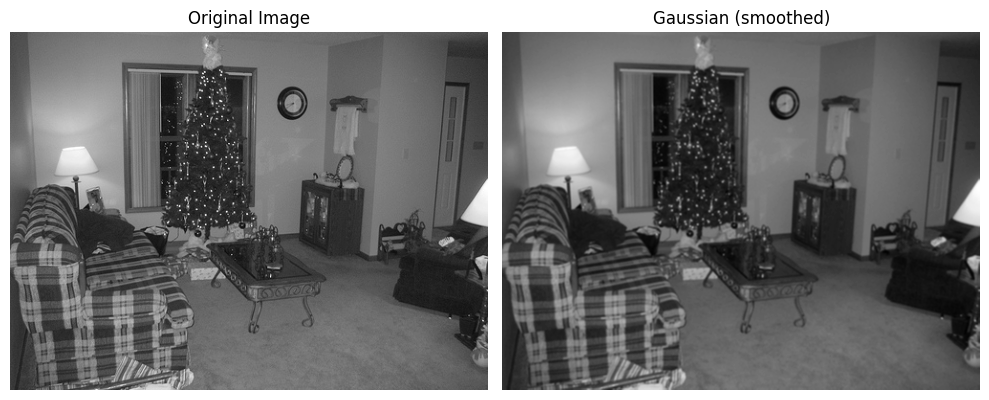

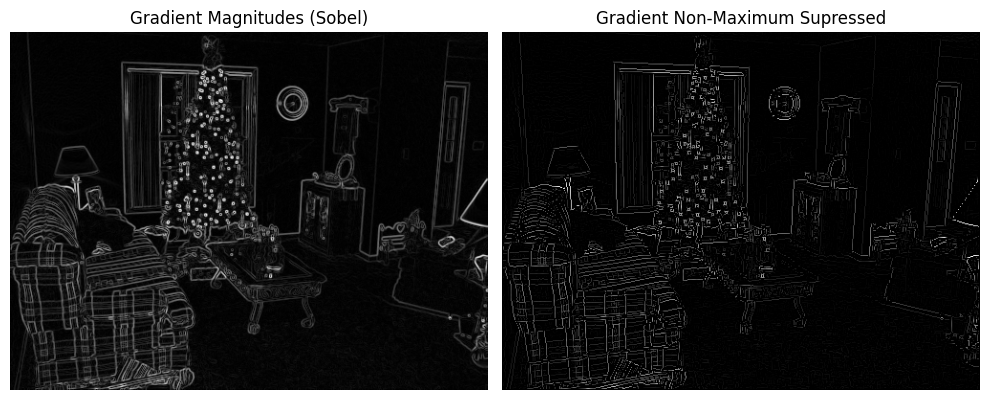

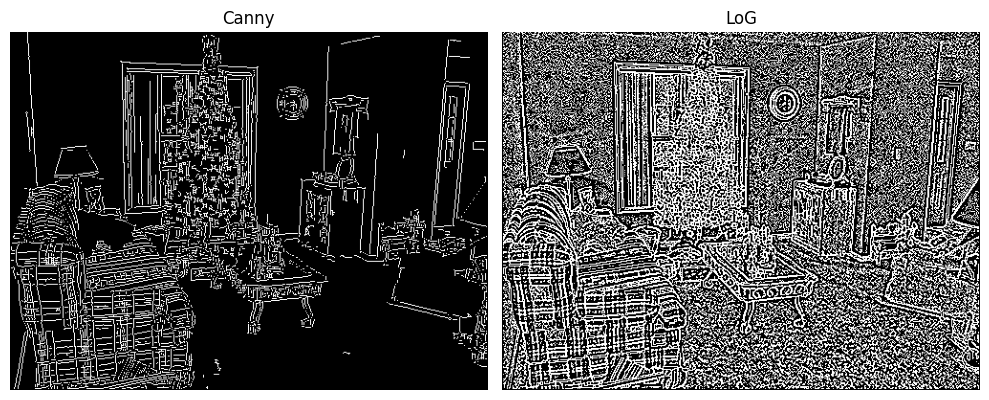

In [8]:
image = cv2.imread("images/images/chair/2009_004687.jpg",cv2.IMREAD_GRAYSCALE)

#Sobel, Canny and LoG
gradient, _ = sobel_edge_detection(image,kernel_size=3)
smoothed, _, g_nms, canny = canny_edge_detector(image, g_size=3)
log = laplacian_of_gaussian(image, sigma=0, g_size=3)

visualize([image,smoothed],["Original Image","Gaussian (smoothed)"],None,None)
visualize([gradient, g_nms],["Gradient Magnitudes (Sobel)","Gradient Non-Maximum Supressed"],None,None)
visualize([canny,log],["Canny","LoG"],None,None)

*(Optional) Find a method to fill the connected regions to obtain segmented regions (instead of edge regions)*

We will apply image segmentation using Felzenswalb algorithm, which is a bottom-up segmentation algorithm that groups pixels into segments based on their color similarity and proximity. The key concept is to iteratively merge adjacent image regions if the cost of merging them is lower than a certain threshold.

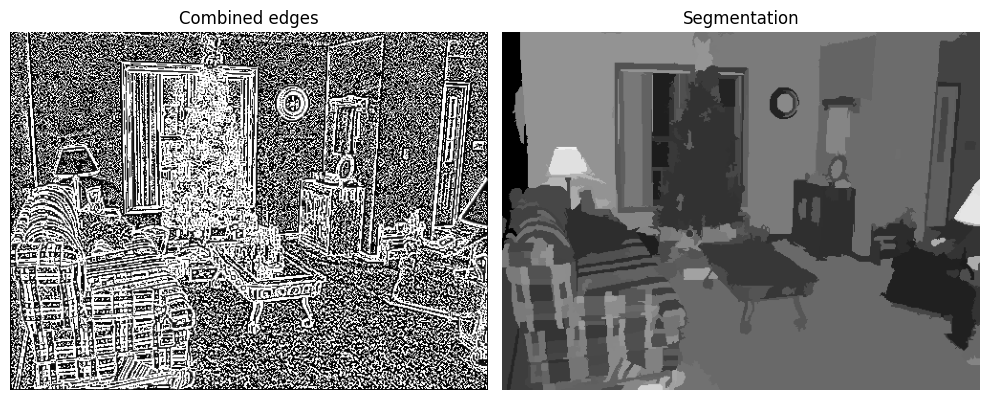

In [9]:
from skimage.segmentation import felzenszwalb
from skimage.color import label2rgb

#Combine the edges
combined_edges = np.uint8(np.maximum(np.maximum(gradient, canny), log))

#Apply Felzenszwalb's Image Segmentation
segments = felzenszwalb(image, scale=100, sigma=0.5, min_size=50)

#Label the regions
segmentation = label2rgb(segments, image=image, kind='avg')

visualize([combined_edges,segmentation],["Combined edges","Segmentation"],None,None)

## 3. Watersheds

**Objective:**
Implement the watershed algorithm for image segmentation.

**Guideline:**
1. Load a Color Image
2. Preprocessing for Marker Computation. Grayscale it, and find `sure`regions for foreground and background areas.
3. Compute Markers: Label the regions (foreground, background, and unknown) to create markers.
4. Apply Watershed Algorithm. use `cv2.watershed` from OpenCV to perform the segmentation. (Optional: implement your own version of watershed by hand)
5. Visualize the Results and display the segmented image, highlighting the boundaries obtained from the watershed algorithm.

### Expected Results:
- Visual representation of image segmentation using the watershed algorithm. Compare the results qualitatively with the original image.


#### WATERSHEDS 1: Using *cv2.distanceTransform*, *cv2.connectedComponents* and *cv2.watershed*

In [9]:
#USING FUNCTIONS
def Watersheds(image):
    """
    Apply watershed algorithm to segment an image.

    Input: greyscale image
    Output: segmented image
    """
    #1. Convert to grayscale and to binary
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    binary_image = np.where(gray <= threshold,0,255).astype(np.uint8)

    #2. Apply opening to remove noise and emphasize edges.
    kernel = np.ones((5, 5), np.uint8)
    opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

    #3. Apply morphological operations to get background and foreground areas.
    #3.1. Get sure background areas with dilation.
    sure_bg = cv2.dilate(opened_image,kernel,iterations=3)
    #3.2. Apply Distance Transform
    distance_tf = cv2.distanceTransform(opened_image, cv2.DIST_L2, 5)
    #3.3. Get sure foreground areas by applying threshold to distance_tf.
    _, sure_fg = cv2.threshold(distance_tf, 0.5 * distance_tf.max(), 255, cv2.THRESH_BINARY)
    sure_fg = sure_fg.astype(np.uint8)
    #3.4. Get unknown areas
    unknown = cv2.subtract(sure_bg,sure_fg)

    #4. Place markers on local minima
    _, markers = cv2.connectedComponents(sure_fg)
    markers +=1 #To distinguish the bg and fg, the values in markers are incremented by 1.
    markers[unknown==255] = 0 #mark the region of unknown to 0.
    first_markers = markers.copy()

    #5. Apply watershed algorithm to markers
    markers = cv2.watershed(image,markers)

    #6. Get outline of segments
    labels = np.unique(markers) #Get array with number of markers
    segments = []
    for label in labels[2:]: #Exclude background(0,1) and edges of objects(-1)
        #Create binary image where only the area in label/marker is white
        target = np.where(markers == label, 255, 0).astype(np.uint8)
        #Do contour extraction on target
        contours,_ = cv2.findContours(target,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        segments.append(contours[0])
    #Draw outline of segments
    outline = image.copy()
    outline[markers == -1] = [0,0,255]

    #7. Visualization
    visualize([image,binary_image,opened_image],["Original Image","Binary image","Opened image"],None,None)
    visualize([sure_bg,distance_tf,sure_fg,unknown],["Sure background","Distance Transform","Sure foreground","Unknown areas"],None,None)
    #Show markers and final outline
    fig, axes = plt.subplots(1, 3, figsize=(10,5))
    axes[0].imshow(first_markers, cmap='gray'), axes[0].set_title("First Markers"), axes[0].axis("off")
    axes[1].imshow(markers, cmap='tab20b'), axes[1].set_title("Markers"), axes[1].axis("off")
    axes[2].imshow(outline), axes[2].set_title("Outline"), axes[2].axis("off")
    plt.tight_layout(), plt.show()

    return distance_tf, markers

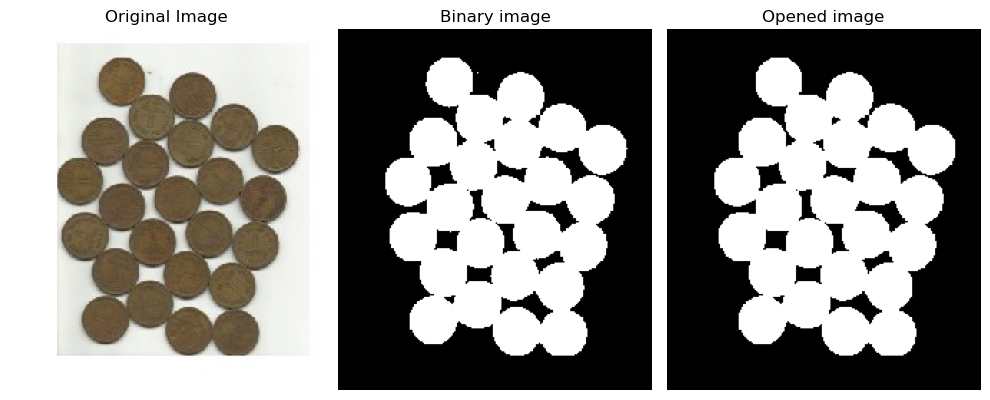

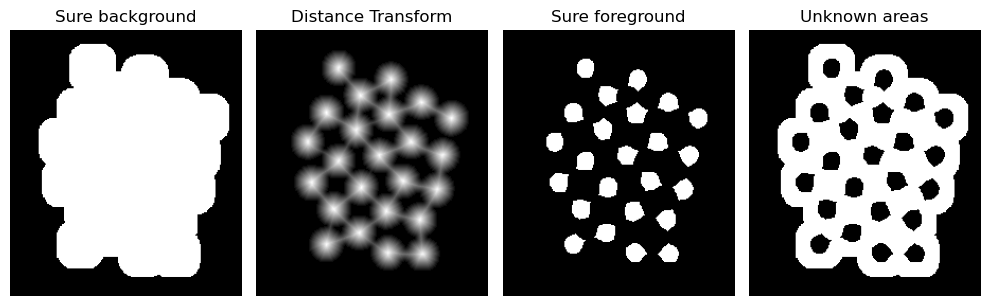

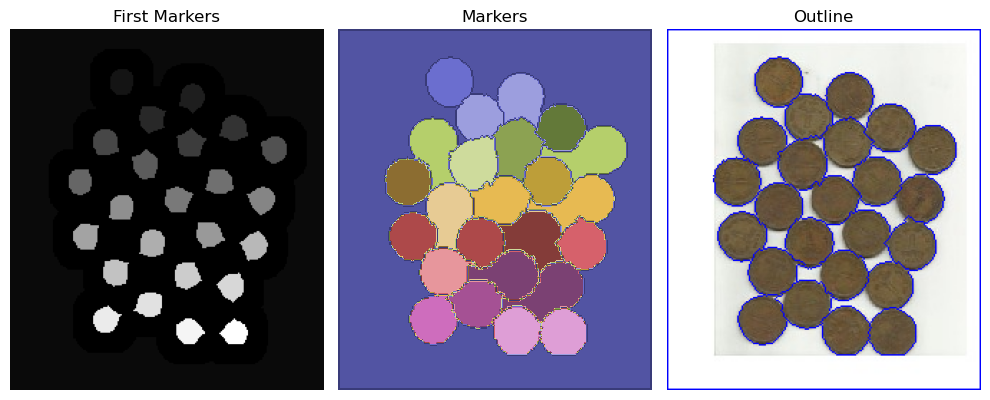

In [10]:
image = cv2.cvtColor(cv2.imread("sample.png",cv2.COLOR_BGR2RGB),cv2.COLOR_BGR2RGB)
distance_transform_f, markers_f = Watersheds(image)

#### WATERSHEDS 2: Manual *cv2.distanceTransform*, *cv2.connectedComponents* and *cv2.watershed*

In [11]:
#MANUALLY
from collections import deque

def DistanceTransform(binary_image):
    """ 
    Calculates the distance of every white pixel to the nearest black pixel.

    Input: binary_image(2D numpy array)
    Output: distance_transform (2D numpy array)
    """
    rows, cols = binary_image.shape
    distance_transform = np.full_like(binary_image, fill_value=np.inf, dtype=float)

    #Store black pixels
    black_pixels = np.argwhere(binary_image == 0)

    #Initialize distances for black pixels to 0
    distance_transform[black_pixels[:, 0], black_pixels[:, 1]] = 0

    #Define 8-connected neighbors
    neighbors = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

    #Perform BFS from each black pixel
    for black_pixel in black_pixels:
        queue = deque([tuple(black_pixel)])
        while queue:
            current_pixel = queue.popleft()

            for neighbor in neighbors:
                neighbor_pixel = (current_pixel[0] + neighbor[0], current_pixel[1] + neighbor[1])

                #Check if the neighbor is within boundaries
                if 0 <= neighbor_pixel[0] < rows and 0 <= neighbor_pixel[1] < cols:
                    #Update distance if it's shorter than the current distance
                    if distance_transform[neighbor_pixel] > distance_transform[current_pixel] + 1:
                        distance_transform[neighbor_pixel] = distance_transform[current_pixel] + 1
                        queue.append(tuple(neighbor_pixel))

    return distance_transform

def GetMarkers(image):
    """ 
    Get markers of a binary image by finding the connected components.
    Implementation: it uses DFS to label connected components. The labels are int
        identifiers assigned in the binary image to mark which pixels are connected.

    Input: binary image (narray)
    Output: markers (narray)
    """
    #Initilialise labels array
    labels = np.zeros_like(image,dtype=int)
    current_label = 0

    def dfs(x,y):
        nonlocal current_label
        #Check if current pixel is within boundaries, is white and not-labeled
        if 0 <= x < image.shape[0] and 0 <= y < image.shape[1] and image[x,y] == 255 and labels[x,y] == 0:
            labels[x,y] = current_label #Assign current label to pixel
            #Visit neighboring pixels
            dfs(x - 1, y)
            dfs(x + 1, y)
            dfs(x, y - 1)
            dfs(x, y + 1)
    
    #Iterate pixels in image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            #If the pixel is white and not labeled --> start a new connected component
            if image[i, j] == 255 and labels[i, j] == 0:
                current_label += 1
                dfs(i, j)

    return labels, current_label


def DoWatersheds(markers,n_markers):
    """
    Apply cv2.watershed function manually following 2 steps:
        1. Flooding: assign pixels to one marker depending on which is closer.
        2. Dam construction: when markers floods meet --> construct a boundary.
    
    Input: labeled image with unknown areas.
    Output: labeled image without unknown areas.
    """
    rows, cols = markers.shape[:2]
    neighbors = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

    #Create a list with all 0 positions
    zero_list = [] #list = [[i,j],[i,j],[i,j]]
    for i in range(rows):
        for j in range(cols):
            if markers[i,j] == 0: #Only check unknown regions
                zero_list.append([i,j])

    #Iterate through list until there are no 0 values
    while len(zero_list) > 0:
        changed_list = [] #Store changed pixels in this iteration
        for pixel in zero_list: #pixel = [i,j]
            n_values = [] #List of values of the neighbours
            #Look at neigbours of pixel
            for neighbour in neighbors:
                n = [pixel[0] + neighbour[0], pixel[1] + neighbour[1]] #n = [x,y]
                #Check if the neighbor is within boundaries
                if 0 <= n[0] < rows and 0 <= n[1] < cols:
                    if n not in zero_list:
                        if n not in changed_list:
                            n_values.append(markers[n[0],n[1]])
            #Check values of neigbours
            if len(n_values) > 0:          
                if max(n_values) != 0:
                    #Isolate non zero values in neighbours
                    non_zero_values = [value for value in set(n_values) if value !=0]
                    #If there are different markers in neighbours, pixel must be boundary (-1)
                    if len(non_zero_values) > 1:
                        markers[pixel[0],pixel[1]] = -1
                        zero_list.remove(pixel)
                        changed_list.append(pixel)
                    else: #If there is only one type of marker in neighbour
                        markers[pixel[0], pixel[1]] = non_zero_values[0]
                        zero_list.remove(pixel)
                        changed_list.append(pixel)

    return markers

def Watersheds_m(image):
    """
    Apply watershed algorithm MANUALLY to segment an image.
    We will perform cv2.distanceTransform, cv2.connectedComponents and cv2.watershed manually.

    Input: greyscale image
    Output: segmented image
    """
    #1. Convert to grayscale and to binary
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    binary_image = np.where(gray <= threshold,0,255).astype(np.uint8)
    
    #2. Apply opening to remove noise and emphasize edges.
    kernel = np.ones((5, 5), np.uint8)
    opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

    #3. Apply morphological operations to get background and foreground areas.
    #3.1. Get sure background areas with dilation.
    sure_bg = cv2.dilate(opened_image,kernel,iterations=3)
    #3.2. Apply Distance Transform
    distance_tf = DistanceTransform(opened_image)
    #3.3. Get sure foreground areas by applying threshold to distance_tf.
    _, sure_fg = cv2.threshold(distance_tf, 0.5 * distance_tf.max(), 255, cv2.THRESH_BINARY)
    sure_fg = sure_fg.astype(np.uint8)
    #3.4. Get unknown areas
    unknown = cv2.subtract(sure_bg,sure_fg)

    #4. Place markers on local minima
    markers, nComponents = GetMarkers(sure_fg)
    markers +=1 #To distinguish the bg and fg, the values in markers are incremented by 1.
    markers[unknown==255] = 0 #Mark the region of unknown to 0.
    first_markers = markers.copy()

    #5. Apply watershed algorithm to markers
    markers = DoWatersheds(markers, nComponents)

    #6. Get outline of segments
    labels = np.unique(markers)
    segments = []
    for label in labels[2:]:
        #Create binary image where only the area in label is fg (white)
        target = np.where(markers == label, 255, 0).astype(np.uint8)
        #Do contour extraction on target
        contours,_ = cv2.findContours(target,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        segments.append(contours[0])
    #Draw outline of segments
    outline = image.copy()
    outline[markers == -1] = [0,0,255]

    #7. Visualization
    visualize([image,binary_image,opened_image],["Original Image","Binary image","Opened image"],None,None)
    visualize([sure_bg,distance_tf,sure_fg,unknown],["Sure background","Distance Transform","Sure foreground","Unknown areas"],None,None)
    #Show markers and final outline
    fig, axes = plt.subplots(1, 3, figsize=(10,5))
    axes[0].imshow(first_markers, cmap='gray'), axes[0].set_title("First Markers"), axes[0].axis("off")
    axes[1].imshow(markers, cmap='tab20b'), axes[1].set_title("Markers"), axes[1].axis("off")
    axes[2].imshow(outline), axes[2].set_title("Outline"), axes[2].axis("off")
    plt.tight_layout(), plt.show()
    print("Number of markers used: ",nComponents)

    return distance_tf, markers

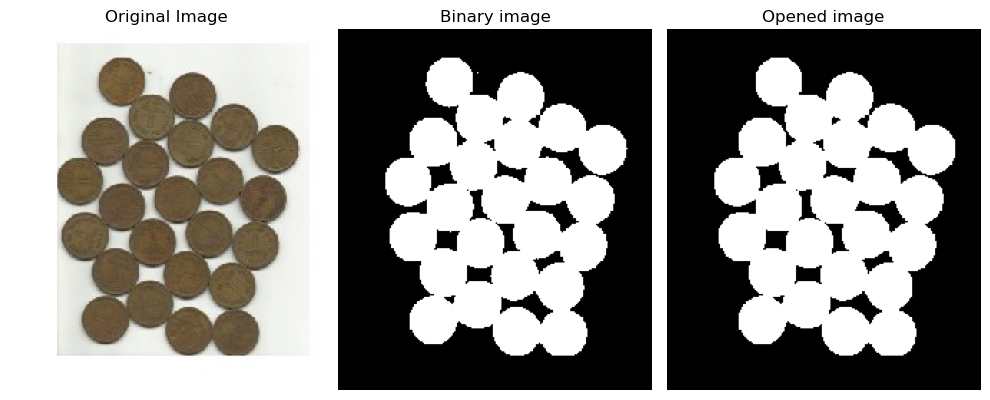

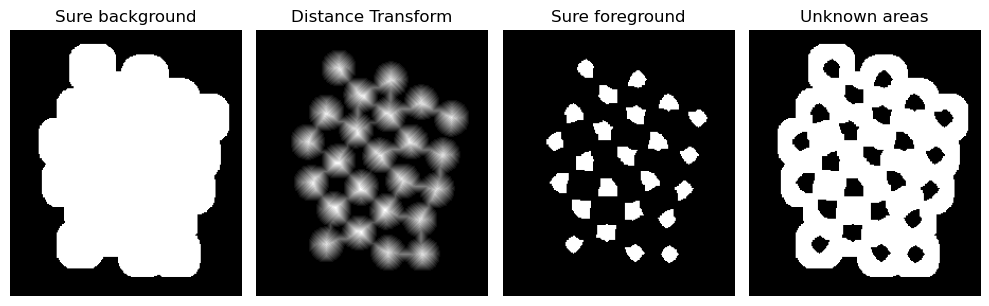

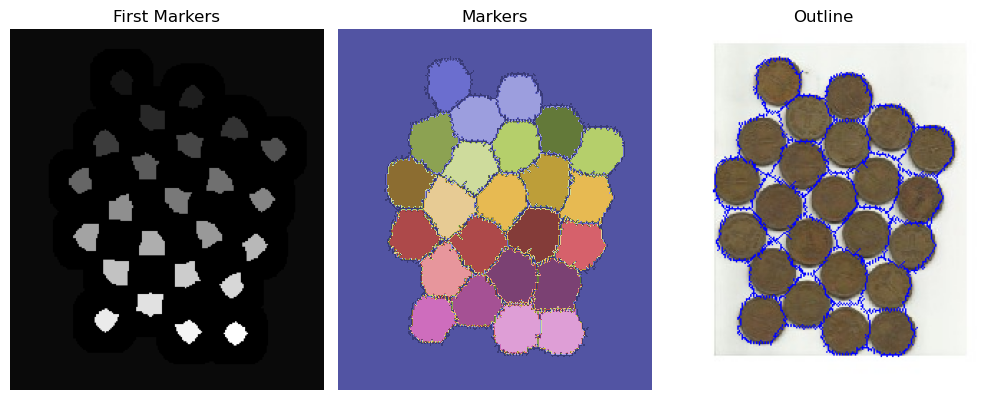

Number of markers used:  24


In [12]:
image = cv2.cvtColor(cv2.imread("sample.png",cv2.COLOR_BGR2RGB),cv2.COLOR_BGR2RGB)
distance_transform_m, markers_m = Watersheds_m(image)

In [13]:
#Compute IoU to compare cv2 functions with implemented manual functions
def calculate_iou(image1, image2):
    """
    Calculate the Intersection over Union (IoU) between two binary images.

    Parameters:
    - image1 (numpy.ndarray): First binary image (0 or 255).
    - image2 (numpy.ndarray): Second binary image (0 or 255).

    Returns:
    - iou (float): Intersection over Union (IoU) value.
    """
    #Ensure images have the same shape
    if image1.shape != image2.shape:
        raise ValueError("Input images must have the same shape.")

    #Convert images to binary (0 or 255)
    image1_binary = (image1 > 0).astype(np.uint8)
    image2_binary = (image2 > 0).astype(np.uint8)

    #Calculate intersection and union
    intersection = np.logical_and(image1_binary, image2_binary)
    union = np.logical_or(image1_binary, image2_binary)

    #Compute IoU
    iou = np.sum(intersection) / np.sum(union)

    return iou

print("IoU of Distance Transform: ",calculate_iou(distance_transform_f,distance_transform_m))
print("IoU of Markers: ",calculate_iou(markers_f,markers_m))

IoU of Distance Transform:  1.0
IoU of Markers:  0.9233891611204563


## 4. Region-Based Segmentation Exercise
**Objective:**  
Explore and implement one region-based segmentation technique. The options are Region Growing, Split-and-Merge, and Flood Fill. These techniques focus on creating image segments based on the similarity and proximity of pixels.

**Guideline:**
1. Choose one of the region-based segmentation methods:
   - **Split-and-Merge (using RAG):** Recursively divides an image into homogeneous regions, then merges adjacent regions with similar characteristics. Represent the image as a Region Adjacency Graph (RAG) using the scikit-image library.
   - **Flood Fill:** Begins from a seed point and expands the region by adding neighboring pixels that match the seed’s properties.

2. Implement the chosen method manually or using appropriate libraries (you can rely on `scikit-image` libraries)
3. Apply the algorithm to a sample image and analyze the results.
4. Perform an analisys of the hyperparameters of the method

**Expected Results:**  
- A segmented image using the selected region-based segmentation method.
- Comparative analysis of the segmented results against the original image to evaluate the effectiveness of the chosen method.


**1. SPLIT AND MERGE (USING RAG)**

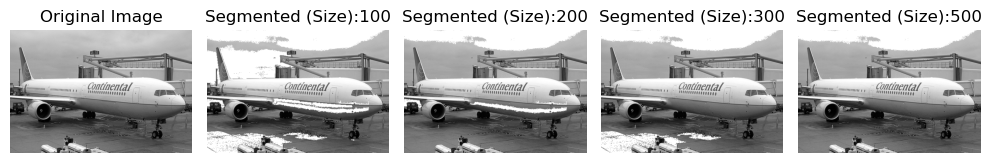

In [14]:
def split_and_merge(image, min_region_size):
    segmented = image.copy()
    def region_growing(image, seed, new_color, tolerance):
        rows, cols = image.shape
        seed_color = image[seed[0], seed[1]]
        stack = [seed]

        while stack:
            x, y = stack.pop()

            if (0 <= x < rows and 0 <= y < cols and np.abs(np.float64(image[x, y]) - np.float64(seed_color)) <= tolerance and segmented[x, y] != new_color):
                segmented[x, y] = new_color
                stack.extend([(x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1)])

    def split(image, min_size):
        for x in range(0, image.shape[0], min_size):
            for y in range(0, image.shape[1], min_size):
                seed = (x, y)
                region_growing(image, seed, 255, 10)

    split(segmented, min_region_size)
    return segmented

images = ["aeroplane/2011_002114.jpg"]
output =[]
for image_path in images:
    image = cv2.imread(f"images/images/{image_path}", cv2.IMREAD_GRAYSCALE)
    output.append(image)
    # Set minimum region size
    min_region_sizes = [100,200,300,500]

    for min_region_size in min_region_sizes:
        segmented_image = split_and_merge(image, min_region_size)
        output.append(segmented_image)
        # Display the result
    titles = ["Original Image", "Segmented (Size):"+str(100), "Segmented (Size):"+str(200), "Segmented (Size):"+str(300), "Segmented (Size):"+str(500)]
    visualize(output, titles, None, 0)

**2.1 FLOOD FILL (LIBRARIES)**

Image shape: (337, 500)
Seed point: (100, 100)
Seed point is valid.


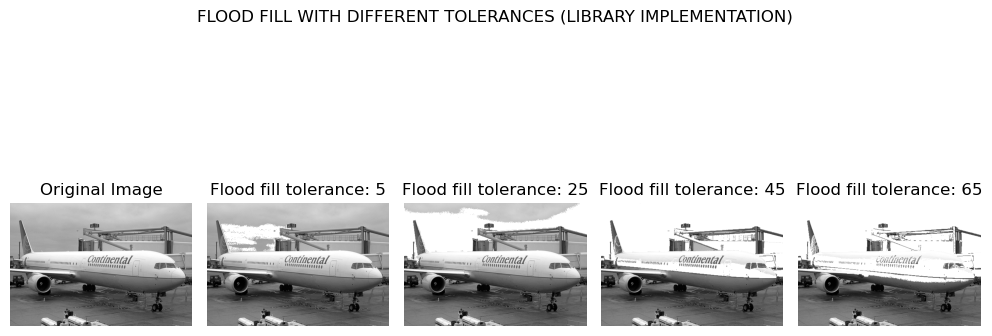

In [15]:
from skimage.segmentation import flood_fill
images = ["aeroplane/2011_002114.jpg"]
for image in images:
    image = cv2.imread(f"images/images/{image}",cv2.IMREAD_GRAYSCALE)
    seed_point = (100, 100)
    print("Image shape:", image.shape)
    print("Seed point:", seed_point)
    if seed_point[0] < image.shape[0] and seed_point[1] < image.shape[1]:#do this to add a condition
        print("Seed point is valid.")
    else:
        print("Seed point is not valid. Please choose a seed point within the image dimensions.")
    new_color_value = 255
    output = []
    output.append(image)
    for i in range(4):
        tol = 5 + 20 * i
        output.append(flood_fill(image, seed_point, new_color_value, tolerance=tol))
    visualize(output,["Original Image","Flood fill tolerance: "+str(5 + 20 * 0),"Flood fill tolerance: "+str(5 + 20 * 1),"Flood fill tolerance: "+str(5 + 20 * 2),"Flood fill tolerance: "+str(5 + 20 * 3)],["FLOOD FILL WITH DIFFERENT TOLERANCES (LIBRARY IMPLEMENTATION)"],0)


**2.2FLOOD FILL (MANUAL)**

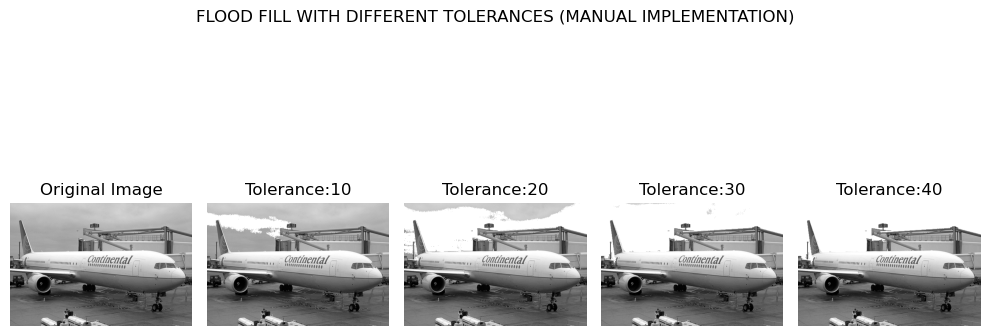

In [16]:
def isValid(x, y, rows, cols, seed_color, current_color, tolerance):
    if x < 0 or x >= rows or y < 0 or y >= cols:
        return False
    pixel_value = current_color[x, y]
    seed_color = seed_color.astype(np.float64)
    return np.all(np.abs(pixel_value - seed_color) <= tolerance)

def floodFillManual(image, seed_point, new_color, tolerance):
    rows, cols = image.shape
    seed_color = image[seed_point[0], seed_point[1]]

    stack = [(seed_point[0], seed_point[1])]

    while stack:
        x, y = stack.pop()

        if isValid(x, y, rows, cols, seed_color, image, tolerance) and image[x, y] != new_color:
            image[x, y] = new_color
            stack.append((x + 1, y))
            stack.append((x - 1, y))
            stack.append((x, y + 1))
            stack.append((x, y - 1))

    return image

for image_path in images:
    image = cv2.imread(f"images/images/{image_path}", cv2.IMREAD_GRAYSCALE)
    seed_point = (50, 50)
    new_color = 255
    tolerances = [10, 20, 30, 40] 
    output_manual = [image]

    for tolerance in tolerances:
        segmented_image = floodFillManual(image.copy(), seed_point, new_color, tolerance)
        output_manual.append(segmented_image)

    titles = ["Original Image","Tolerance:"+str(10),"Tolerance:"+str(20),"Tolerance:"+str(30),"Tolerance:"+str(40)]
    suptitles = ["FLOOD FILL WITH DIFFERENT TOLERANCES (MANUAL IMPLEMENTATION)"]

    visualize(output_manual, titles, suptitles, 0)


## 5. Cluster-based Segmentation Exercise

**Objective:**  
Analysis between K-means clustering and Gaussian Mixture Models (GMM).
You can use the code or modify at your own.

**Guideline:**
1. Load a color image.
2. Perform an analisys of the hyperparameters of the method
3. Analyze the results and compare the effectiveness of the methods on image segmentation.
4. (Optional) Add extra functionalities to any algorithm

**Expected Results:**  
- Images segmented into distinct regions based on the clustering algorithm.
- In-depth analysis of the segmentation performance, discussing the suitability of the chosen method for the image characteristics.

### 5.1. K-MEANS

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from skimage.color import rgb2lab, rgb2hsv, hsv2rgb, lab2rgb
from skimage import io

def segment_image(image, color_space='RGB', auto_select_clusters=False, max_clusters=10, init='k-means++', n_init=10, max_iter=300, tol=1e-4, random_state=None):
    """
    Segments the given image using K-means clustering with options for automatic cluster selection and different color spaces.
    
    Parameters:
    - image: np.ndarray, original RGB input image.
    - color_space: str, color space to convert the image ('rgb', 'hsv', 'lab', etc.).
    - auto_select_clusters: bool, whether to perfom an automatic selection of the number of clusters.
    - max_clusters: int, maximum number of clusters.
    - init: str, parameter for KMeans().
            - If init == "k-means++": selects initial cluster centroids using sampling based on empirical probability distribution
                                    of the point's contribution to the overall inertia. Speeds up convergence. (default)
            - Elif init == "random": choose n_clusters rows at random for initial centroids.
            - Elif init == array of shape (n_clusters, n_features): it gives initial centers.
    - n_init: int, parameter for KMeans(): number of iterations with different centroid seeds. (default: n_init=10)
    - max_iter: int, parameter for KMeans(): maximum number of iterations. (default: max_iter=300)
    - tol: float, parameter for KMeans(): tolerance of Frobenius norm of difference in centroids of 2 consecutive iterations. (default: tol=1e-4)
    - random_state: int, parameter for KMeans(): random number generation for centroid initialization. If int -> randomness is deterministic. (default=None)

    Returns:
    - segmented_image: np.ndarray, the segmented image.
    """

    # Convert image to the specified color space
    if color_space == 'HSV':
        converted_image = rgb2hsv(image)
    elif color_space == 'Lab':
        converted_image = rgb2lab(image)
    else:
        converted_image = image.copy()  # Copy to avoid modifying the original image

    # Preprocess the image
    image_reshaped = converted_image.reshape((-1, 3))

    # Automatic cluster selection
    if auto_select_clusters:
        best_score = -1
        best_k = 2
        for k in range(2, max_clusters + 1):
            kmeans = KMeans(n_clusters=k, init=init, n_init=n_init, max_iter=max_iter, tol=tol, random_state=random_state)
            labels = kmeans.fit_predict(image_reshaped)
            score = calinski_harabasz_score(image_reshaped, labels)
            if score > best_score:
                best_score = score
                best_k = k
        n_clusters = best_k
    else:
        n_clusters = max_clusters

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter, tol=tol, random_state=random_state)
    kmeans.fit(image_reshaped)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]

    # Reshape the segmented image
    segmented_img = segmented_img.reshape(converted_image.shape)

    # Convert segmented image back to RGB if necessary
    if color_space == 'HSV':
        segmented_img = hsv2rgb(segmented_img)
    elif color_space == 'Lab':
        segmented_img = lab2rgb(segmented_img)
    elif color_space == 'RGB':
        segmented_img = segmented_img.astype(np.uint8)

    print("K = ", n_clusters)
    return segmented_img

import imutils
lenna = imutils.url_to_image('https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg')


#### Analysis of results with different parameters

##### 1. color_space

K =  4
K =  3
K =  3


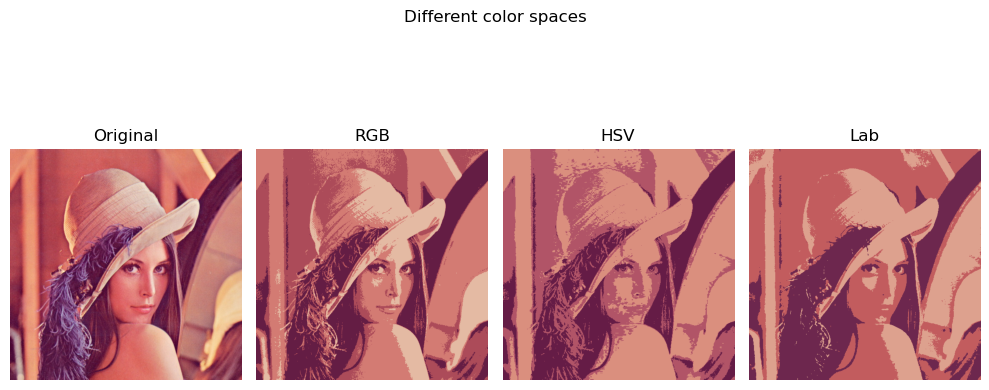

In [18]:
#Different color spaces
visualize([lenna[:, :, ::-1],
            segment_image(lenna[:, :, ::-1],color_space='RGB', max_clusters=20, auto_select_clusters=True),
            segment_image(lenna[:, :, ::-1],color_space='HSV', max_clusters=20, auto_select_clusters=True),
            segment_image(lenna[:, :, ::-1],color_space='Lab', max_clusters=20, auto_select_clusters=True)],
            ["Original","RGB","HSV","Lab"],["Different color spaces"],0)  

K-means can vary across color spaces because the intensity values for the pixels are different. RGB represents colors with Red, Green and Blue channels; HSV separates color information in hue, saturation and value components; and Lab consists of 3 components: L* (lightness), a* (green to red), and b* (blue to yellow). 

In Lab, for instance, the perceptual difference of colors is more consistent, that's why its clustering result looks less detailed even if it has used the same K value as HSV.

Let's consider an image where color information is represented by hue, that would be an image with different colored cobjects. In this case, performing K-means clustering in HSV color space may result in more natural clusters compared to RGB.

##### 2. auto_select_clusters

K =  4
K =  20


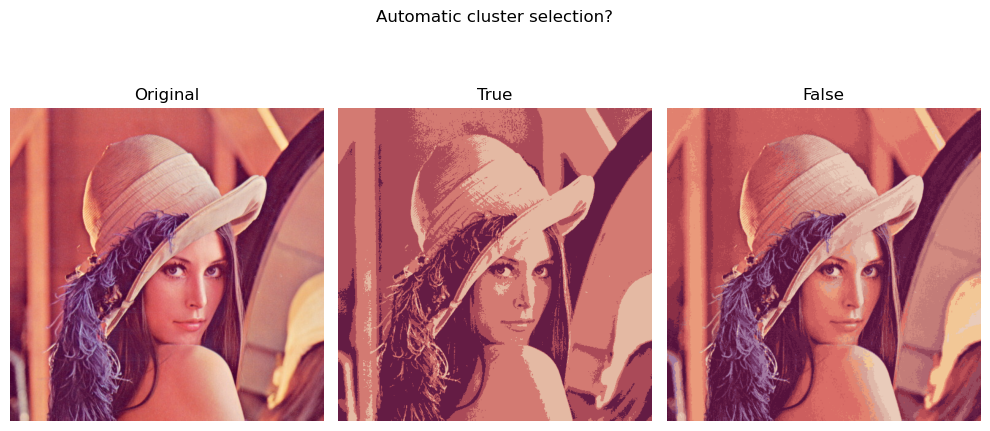

In [19]:
#Auto select clusters
visualize([lenna[:, :, ::-1],
            segment_image(lenna[:, :, ::-1],color_space='RGB', max_clusters=20, auto_select_clusters=True),
            segment_image(lenna[:, :, ::-1],color_space='RGB', max_clusters=20, auto_select_clusters=False)],
            ["Original","True","False"],["Automatic cluster selection?"],0) 

If we don't apply the autoselection of clusters, which selects which is the best number of clusters for each image (best K), the number of clusters will be set to the max_clusters (in this case 20). As we can see, the result of the image segmented without selecting the best K is not well segmented. 
But, how does it select the best K? It performs KMeans iteratively for different values of k from 2 (minimum possible k) to the maximum number of clusters we implied. For each K result:
- First it performs fit_predict, which computes cluster centers and predicts cluster index for each sample. 
- Then, it performs calinski_harabasz_score with the reshaped image and the labels we got from fit_predict. This function computes a score defined as a ratio of the sum between-cluster dispersion and of within-cluster dispersion. This way we can know how well a K performed.

We will keep the best score we get and use that k for KMeans().


##### 3. max_clusters

K =  4
K =  4
K =  4
K =  4


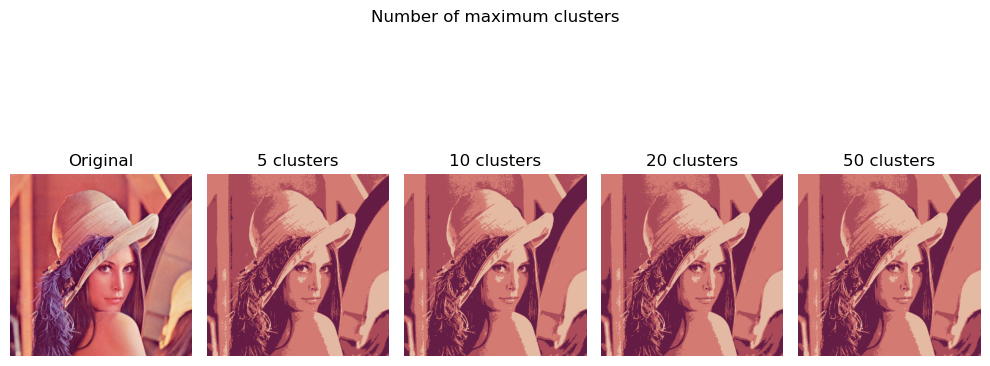

In [20]:
#Max clusters
visualize([lenna[:, :, ::-1],
            segment_image(lenna[:, :, ::-1],color_space='RGB', max_clusters=5, auto_select_clusters=True),
            segment_image(lenna[:, :, ::-1],color_space='RGB', max_clusters=10, auto_select_clusters=True),
            segment_image(lenna[:, :, ::-1],color_space='RGB', max_clusters=20, auto_select_clusters=True),
            segment_image(lenna[:, :, ::-1],color_space='RGB', max_clusters=50, auto_select_clusters=True)],
            ["Original","5 clusters","10 clusters","20 clusters","50 clusters"],["Number of maximum clusters"],0)

By choosing different values for the max_clusters, since we have the auto_select_clusters=True, we are choosing how many values of K the algorithm considers. If the auto_select_clusters = False, the max_clusters value would set the K value for the algorithm. The smaller the K value, the more segmented the image will be, but a very low number can lead to over-segmentation. On the other hand, the larger the K value, the less segmented the image will be, and it can lead to under-segmentation.

In this case, we can see that even if we increase the number of maximum clusters, the algorithm will always choose the most optimal K (which is 4 in this image), but since the number of maximum clusters is higher, it will look for more options than a low number of maximum clusters. By looking at more K options, the algorithm is more computationally expensive: it takes less that 4 minutes to compute the first 3 examples (5, 10 and 20 clusters) but more than 8 minutes to compute the last example with max_clusters=50.



##### 4. init

K =  4
K =  4


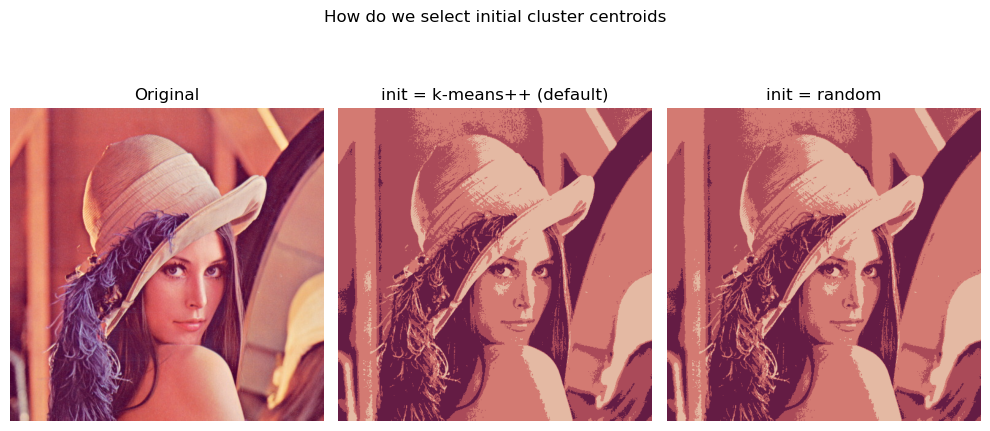

In [21]:
#Selection of initial centroids
visualize([lenna[:, :, ::-1],
            segment_image(lenna[:, :, ::-1],color_space='RGB', max_clusters=20, auto_select_clusters=True, init="k-means++"),
            segment_image(lenna[:, :, ::-1],color_space='RGB', max_clusters=20, auto_select_clusters=True, init="random")],
            ["Original","init = k-means++ (default)","init = random"],["How do we select initial cluster centroids"],0) 

By changing the "init" parameter we are changing the way the algorithm will choose the initial centroids, which is crutial for the final clustering result. If we choose the "k-means++" mode, it will select the initial centroids using sampling based on empirical probability distribution of the point's contribution to the overall inertia. On the other hand, by choosing "random" mode, it will choose the values at random.

If we choose "random" instead of "k-means++", the initialization will be faster (because it's random) and we can have a more diverse set of starting points. However, it is more probable to converge to a local minima if bad initial points are chosen, and it will give less deterministic results. This is why the default mode is recommended.

There is another mode that we haven't tried, which is passing an array with (n_clusters, n_features), which means that we would choose exactly the centroids the algorithm starts with.

In this case, the results don't change based on this parameter.

##### 5. n_init

K =  4
K =  4
K =  4


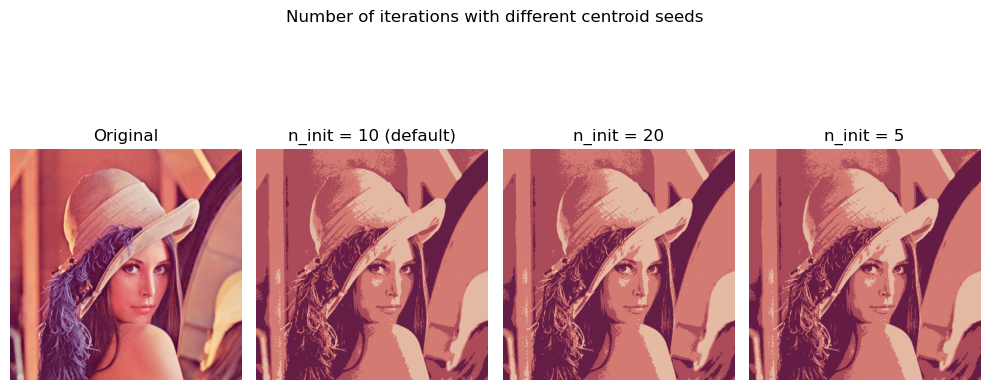

In [22]:
#Number of iterations with different centroid seeds
visualize([lenna[:, :, ::-1],
            segment_image(lenna[:, :, ::-1],color_space='RGB', max_clusters=5, auto_select_clusters=True, n_init=10),
            segment_image(lenna[:, :, ::-1],color_space='RGB', max_clusters=5, auto_select_clusters=True, n_init=20),
            segment_image(lenna[:, :, ::-1],color_space='RGB', max_clusters=5, auto_select_clusters=True, n_init=5)],
            ["Original","n_init = 10 (default)","n_init = 20","n_init = 5"],["Number of iterations with different centroid seeds"],0) 

The n_init parameter controls the number of times the K-means algorithm is run with different centroid seeds. he final result is the one with the lowest inertia, which is the sum of squared distances between data points and their assigned centroids. 

If we choose a lower n_init the computation will be faster because the algorithm is executed fewer times, but it will make the algorithm more sensitive to the initial placement of the centroids, because with less initializations there is a higher risk of getting stuck in local minima (a suboptimal solution). 

On the other hand, choosing a higher n_init will increase the robustness of the algorithm (reducing initialization sensitivity), so it is more likely to find the global optimal solution. It also will have more probability to find the best clusters since it will explore a larger search space. However, the computational cost will be increase because we increase the number of executions.

##### 6. max_iter

K =  4
K =  4
K =  4


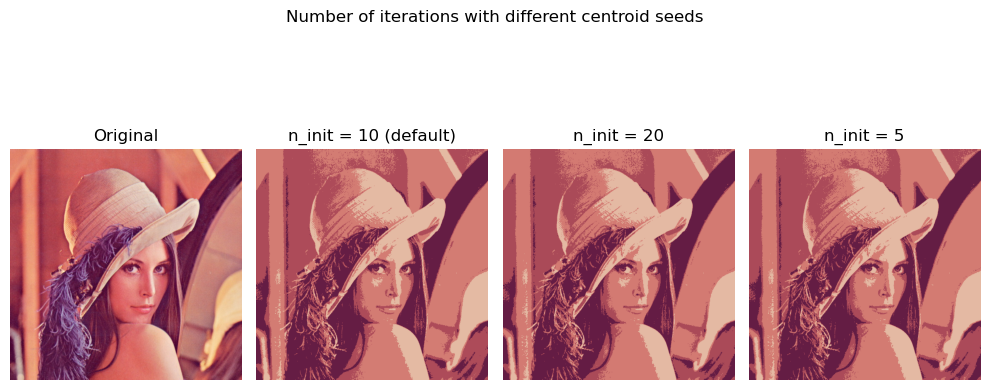

In [23]:
#Number of maximum iterations
visualize([lenna[:, :, ::-1],
            segment_image(lenna[:, :, ::-1],color_space='RGB', max_clusters=5, auto_select_clusters=True, max_iter=300),
            segment_image(lenna[:, :, ::-1],color_space='RGB', max_clusters=5, auto_select_clusters=True, max_iter=100),
            segment_image(lenna[:, :, ::-1],color_space='RGB', max_clusters=5, auto_select_clusters=True, max_iter=500)],
            ["Original","n_init = 10 (default)","n_init = 20","n_init = 5"],["Number of iterations with different centroid seeds"],0) 

The max_iter parameter in K-means clustering determines the maximum number of iterations the algorithm is allowed to run during a single initialization. It controls how many times the centroids are updated in an attempt to converge to a stable solution. If the algorithm does not converge within the specified number of iterations, it stops, and the current centroids are considered as the final result.

If we choose a lower max_iter, it can lead to a faster convergence, especially if clusters are well separated, but it may cause the algorithm to converge to a suboptimal solution because it stops before reaching the true convergence point.

On the other hand, choosing a higher max_iter provides more iterations for the algorithm to converge. This can be useful when dealing with complex data or when the clusters are not well-separated. However, it will be more computational expensive.

### 5.2. GAUSSIAN MIXTURE MODELS

In [24]:
import numpy as np
from sklearn.mixture import GaussianMixture
from skimage import io, color, transform
from sklearn.preprocessing import MinMaxScaler


def segment_image(image, resize_factor=1,color_space='hsv', max_components=10, covariance_type='tied',normalization=False):
    """
    Segments an image using Gaussian Mixture Models.

    Parameters:
    - resize_factor: int, factor by which the image is resized to reduce computation.
    - color_space: str, color space to convert the image ('rgb', 'hsv', 'lab', etc.).
    - n_components: int, number of components for GMM.
    - covariance_type: str, type of covariance parameters to use.
    - normalization: bool, whether to normalize the image data.

    Returns:
    - segmented_image: np.ndarray, the segmented image.
    """

    # Resize for faster processing
    if resize_factor != 1:
        image = transform.resize(image, (image.shape[0] // resize_factor, image.shape[1] // resize_factor), anti_aliasing=True)

    # Convert to desired color space
    if color_space == 'hsv':
        image_converted = color.rgb2hsv(image)
    elif color_space == 'lab':
        image_converted = color.rgb2lab(image)
    else:
        image_converted = image.copy()

    # Reshape the image to be a two-dimensional array
    image_array = image_converted.reshape(-1, 3)

    # Normalize the image data if specified
    if normalization:
        scaler = MinMaxScaler()
        image_array = scaler.fit_transform(image_array)

    best_aic = np.inf
    best_n_components = 1

    for n in range(1, max_components + 1):
        gmm = GaussianMixture(n_components=n, covariance_type=covariance_type, random_state=0)
        gmm.fit(image_array)
        current_aic = gmm.aic(image_array)
        #print(f"{n}: {current_aic}")
        if current_aic < best_aic:
            best_aic = current_aic
            best_n_components = n

    # Initialize and fit the GMM
    gmm = GaussianMixture(n_components=best_n_components, covariance_type=covariance_type, random_state=0)
    gmm.fit(image_array)

    # Predict the cluster assignment for each pixel
    segmentation = gmm.predict(image_array)

    # Replace each pixel with the mean color of its segment
    means = gmm.means_
    segmented_image = np.array([means[label] for label in segmentation])

    # Reshape back to the original image shape
    segmented_image = segmented_image.reshape(image.shape[0], image.shape[1], 3) #se ve blanca

    # Convert back to RGB if necessary
    if color_space == 'hsv':
        segmented_image = color.hsv2rgb(segmented_image)
    elif color_space == 'lab':
        segmented_image = color.lab2rgb(segmented_image)
    elif color_space == "RGB":
        segmented_image = segmented_image.astype(np.uint8)
        # Clip pixel values to the valid range for display
        segmented_image = np.clip(segmented_image, 0, 1)

    print("Number of components = ",best_n_components)
    return segmented_image


#### Analysis of results with different parameters

##### 1. color_space

Number of components =  10
Number of components =  10
Number of components =  10


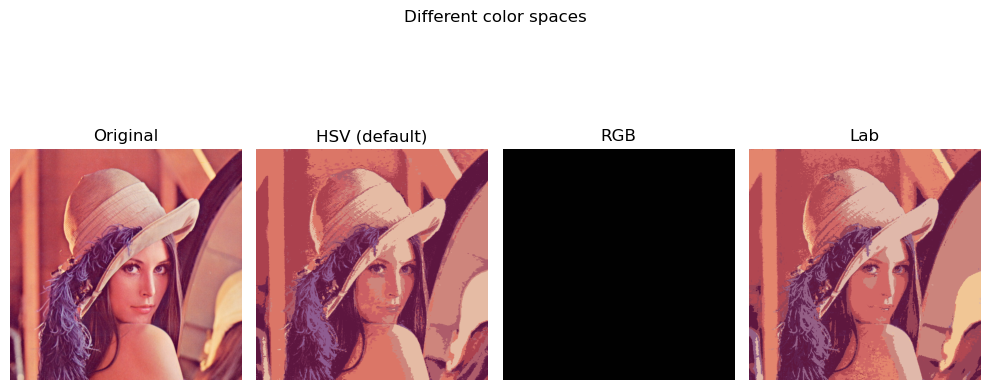

In [25]:
#Different color spaces
visualize([lenna[:, :, ::-1],
            segment_image(lenna[:, :, ::-1], color_space='hsv', max_components=10, covariance_type='full'),
            segment_image(lenna[:, :, ::-1], color_space='RGB', max_components=10, covariance_type='full'),
            segment_image(lenna[:, :, ::-1], color_space='lab', max_components=10, covariance_type='full')],
            ["Original","HSV (default)","RGB","Lab"],["Different color spaces"],0)  

As we said before, the same image in different color spaces has different intensity values for each channels because they represent different color information. Therefore, we will see different clustering results.

##### 2. max_components

Number of components =  5
Number of components =  10
Number of components =  20


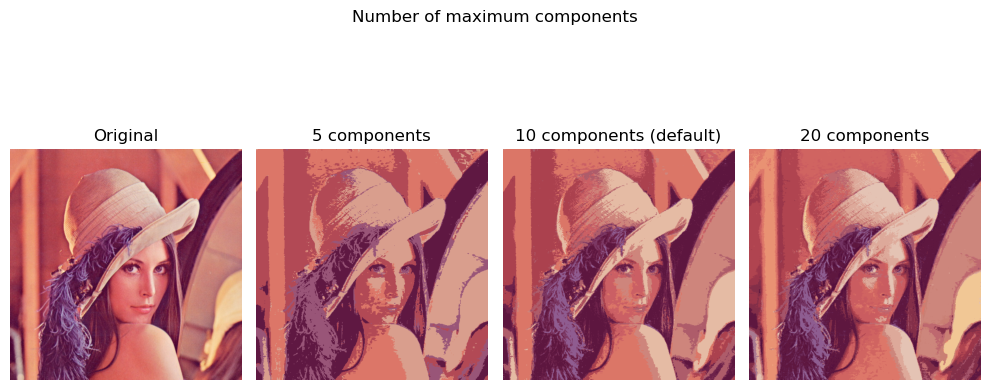

In [26]:
#Number of maximum components
visualize([lenna[:, :, ::-1],
            segment_image(lenna[:, :, ::-1], color_space='hsv', max_components=5, covariance_type='full'),
            segment_image(lenna[:, :, ::-1], color_space='hsv', max_components=10, covariance_type='full'),
            segment_image(lenna[:, :, ::-1], color_space='hsv', max_components=20, covariance_type='full')],
            ["Original","5 components","10 components (default)","20 components"],["Number of maximum components"],0)  

The max_components parameter controls the maximum number of components (clusters) that the GMM will try to fit to the data. We are trying to find the best value for the number of clusters by doing the following:
- We considerate a range for the number of clusters from 2 to max_components. The higher this parameter, the more numbers we will considerate for the most optimal number of clusters. If the number is too high, there is a risk of overfitting.
- We try all the numbers in the range by computing the Gaussian Mixture and calculating a score of quality. This score is computed with .aic (Akaike), which is a measure of quality that takes complexity into account. The lower this score is, the better. We will choose the number of components that give the best score.

In this case we see that by increasing the number of components, for this image the algorithm chooses a higher number of clusters, which means that it is more optimal than choosing lower number of clusters.

##### 3. covariance_type

Number of components =  10
Number of components =  10
Number of components =  10
Number of components =  10


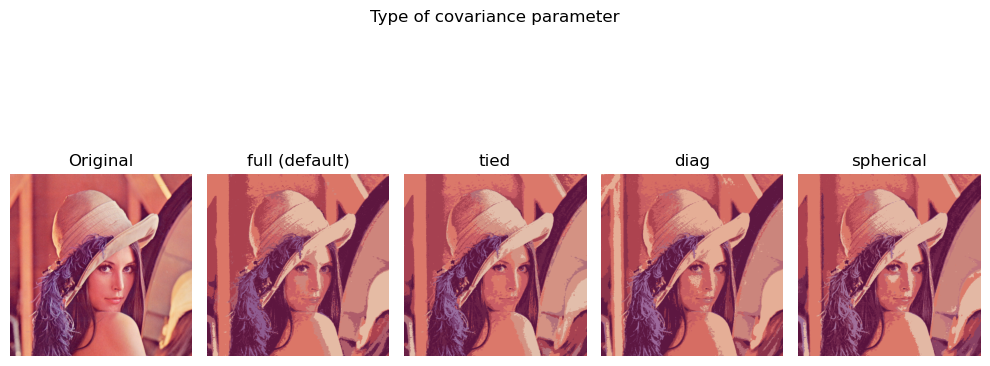

In [27]:
#Type of covariance parameter to use
visualize([lenna[:, :, ::-1],
            segment_image(lenna[:, :, ::-1], color_space='hsv', max_components=10, covariance_type='full'),
            segment_image(lenna[:, :, ::-1], color_space='hsv', max_components=10, covariance_type='tied'),
            segment_image(lenna[:, :, ::-1], color_space='hsv', max_components=10, covariance_type='diag'),
            segment_image(lenna[:, :, ::-1], color_space='hsv', max_components=10, covariance_type='spherical')],
            ["Original","full (default)","tied","diag","spherical"],["Type of covariance parameter"],0)  

The covariance_type parameter in GMM specifies the type of covariance matrices used by the model. 
- "full": is the default option where each component in the mixture has its own general covariance matrix. This is the most flexible option but also requires estimating a large number of parameters, so it is computationaly more expensive. It allows for elliptical, rotated, and correlated clusters.
- "tied": here all components share the same general covariance matrix. This reduces the number of parameters to estimate and can be computationally more efficient. But, it assumes that all clusters have the same shape, size, and orientation.
- "diag": now each component has its own diagonal covariance matrix (no cross-covariances). This assumes that the dimensions are uncorrelated and can result in clusters aligned with the coordinate axes.
- "spherical": each component has its own single variance (scalar). This assumes that the dimensions are uncorrelated and have equal variance. It leads to spherical-shaped clusters.

In this case, the results change depending on which covariance matrix we use. In our opinion, the full and diag look the best for this image.

##### 4. normalization

Number of components =  10
Number of components =  10


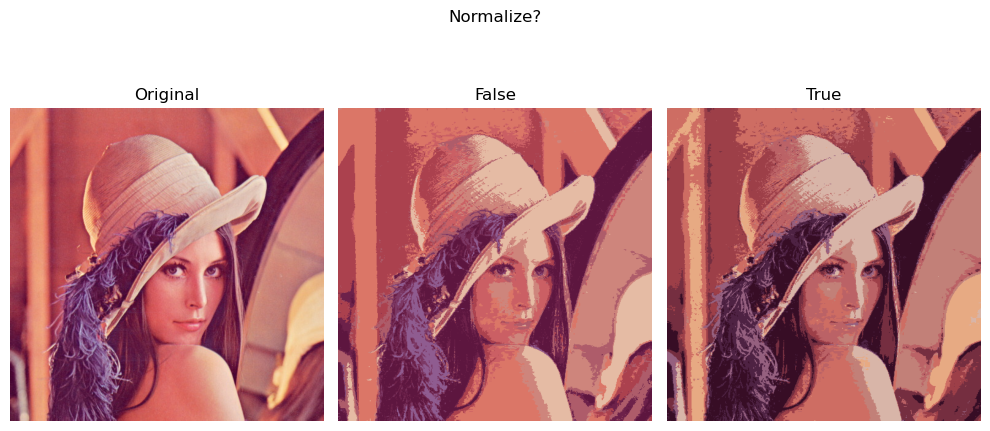

In [28]:
visualize([lenna[:, :, ::-1],
            segment_image(lenna[:, :, ::-1], color_space='hsv', max_components=10, covariance_type='full', normalization=False),
            segment_image(lenna[:, :, ::-1], color_space='hsv', max_components=10, covariance_type='full',normalization=True)],
            ["Original","False","True"],["Normalize?"],0)  

The "normalization" parameter determines whether the input image data is normalized or not before applying the GMM algorithm. If we normalize it, the algorithm will be less sensitive to variations in the absolute intensity of teh colors, but we will lose information about the intensity. This might be important if the segmentation task requires preserving the original intensity characteristics of the image. On the other hand, if we don't normalize, we preserve original intensities but it can become sensitive to variations. To choose one or another depends on our objectives: for scale-invariant tasks it is better to normalize, but for intensity-sensitive tasks is better not to.

##### 5. resize_factor

Number of components =  10
Number of components =  10
Number of components =  10


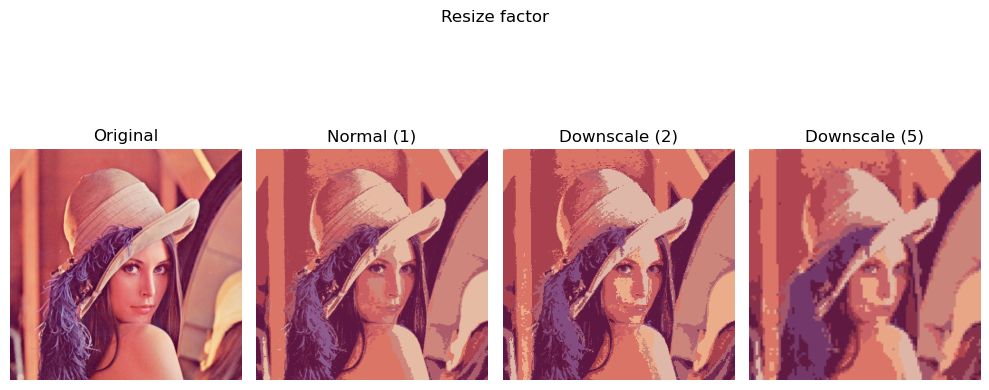

In [29]:
visualize([lenna[:, :, ::-1],
            segment_image(lenna[:, :, ::-1], color_space='hsv', max_components=10, covariance_type='full',resize_factor=1),
            segment_image(lenna[:, :, ::-1], color_space='hsv', max_components=10, covariance_type='full',resize_factor=2),
            segment_image(lenna[:, :, ::-1], color_space='hsv', max_components=10, covariance_type='full',resize_factor=5)],
            ["Original","Normal (1)","Downscale (2)","Downscale (5)"],["Resize factor"],0)

The resize_factor parameter controls the factor by which the input image is resized before applying the GMM algorithm. The resizing operation can have implications for the computational efficiency of the algorithm and the visual appearance of the segmentation results. If we resize image we will reduce computation time but also we will lose details in the segmentation.

### 5.3. CONCLUSIONS

Let's compare the best parameters of each method for lenna image and analyse which method is best:

In [30]:
#Since functions have same name, we repeat here the K-Means function with a different name
def segment_image1(image, color_space='RGB', auto_select_clusters=False, max_clusters=10, init='k-means++', n_init=10, max_iter=300, tol=1e-4, random_state=None):
    # Convert image to the specified color space
    if color_space == 'HSV':
        converted_image = rgb2hsv(image)
    elif color_space == 'Lab':
        converted_image = rgb2lab(image)
    else:
        converted_image = image.copy()  # Copy to avoid modifying the original image

    # Preprocess the image
    image_reshaped = converted_image.reshape((-1, 3))

    # Automatic cluster selection
    if auto_select_clusters:
        best_score = -1
        best_k = 2
        for k in range(2, max_clusters + 1):
            kmeans = KMeans(n_clusters=k, init=init, n_init=n_init, max_iter=max_iter, tol=tol, random_state=random_state)
            labels = kmeans.fit_predict(image_reshaped)
            score = calinski_harabasz_score(image_reshaped, labels)
            if score > best_score:
                best_score = score
                best_k = k
        n_clusters = best_k
    else:
        n_clusters = max_clusters

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter, tol=tol, random_state=random_state)
    kmeans.fit(image_reshaped)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]

    # Reshape the segmented image
    segmented_img = segmented_img.reshape(converted_image.shape)

    # Convert segmented image back to RGB if necessary
    if color_space == 'HSV':
        segmented_img = hsv2rgb(segmented_img)
    elif color_space == 'Lab':
        segmented_img = lab2rgb(segmented_img)
    elif color_space == 'RGB':
        segmented_img = segmented_img.astype(np.uint8)

    print("K = ", n_clusters)
    return segmented_img

For the K-means algorithm, the best parameters for this image were:
- max_clusters = 5, because optimal number of clusters is 4.
- auto_select_clusters = True, because we find optimal number of clusters.
- Other parameters are the default ones.

For GMM algoritm, the best parameters for this image were:
- color_space = "hsv"
- max_components = 20, because it showed that a higher number of clusters gave a more optimal solution.
- covariance_type = "full"
- resize_factor = 1, we should not resize the image to not loose details.
- normalize = false, we should not normlaize to get original intensities of image.
- Other parameters are the default ones.

K =  4
Number of components =  20


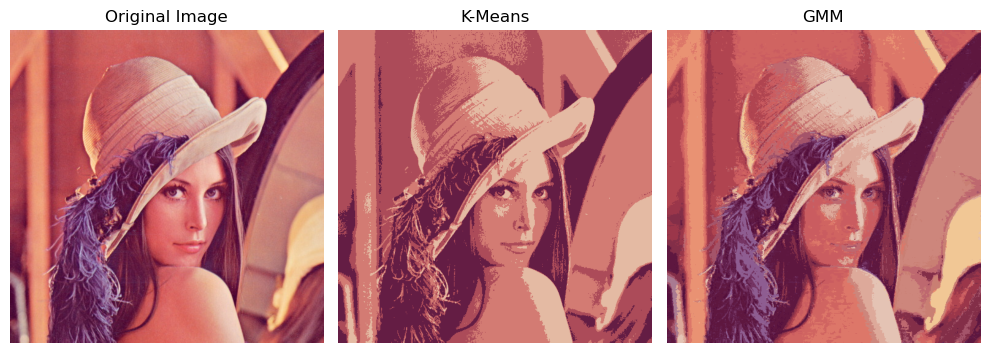

In [31]:
visualize([lenna[:, :, ::-1],
           segment_image1(lenna[:, :, ::-1],color_space='RGB', max_clusters=5, auto_select_clusters=True, max_iter=300),
            segment_image(lenna[:, :, ::-1], color_space='hsv', max_components=20, covariance_type='full',resize_factor=1)],
            ["Original Image","K-Means","GMM"],None,None)

We think that the method that looks the best is GMM, however, it takes much more time to execute than K-means, but the results are more detailed. K-Means took 4 seconds while GMM took 5 minutes.